In [ ]:
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
df = pd.read_csv('Dataset/heart_disease_data.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
x = df.drop(columns='target',axis=1)
y = df['target']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
#Model 1 : RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
print(f"accuracy_score on training data:  {accuracy_score(y_train,y_train_pred)}")
print(f"accuracy_score on test data:  {accuracy_score(y_test,y_test_pred)}")
print(f"classification report on training data:{classification_report(y_train,y_train_pred)}")
print(f"classification report on training data:{classification_report(y_test,y_test_pred)}")

accuracy_score on training data:  1.0
accuracy_score on test data:  0.8524590163934426
classification report on training data:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

classification report on training data:              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



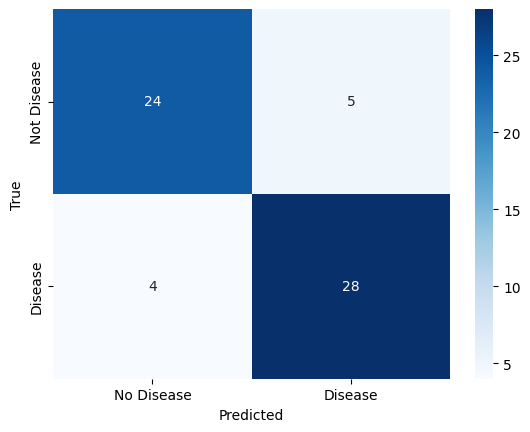

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)
plt.Figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['No Disease', 'Disease'], yticklabels=['Not Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
#Testing the Model 1
a = [100	,0,	7	,90	,133	,1	,0	,450	,1	,8.3	,0	,0	,1]
y_set = rf.predict([a])
print(y_set[0])

1


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
# Model 2  : Support vector machine
sd = StandardScaler()
sd.fit(x)
x_fit= sd.transform(x)

x_train1,x_test1,y_train1,y_test1=train_test_split(x_fit,y,test_size=0.2,random_state=42)

sv = SVC(kernel='linear')
sv.fit(x_train1,y_train1)
y_train_pred1 = sv.predict(x_train1)
y_test_pred1 = sv.predict(x_test1)
print(f"accuracy_score on training data: {accuracy_score(y_train1,y_train_pred1)}")
print(f"accuracy_score on test data: {accuracy_score(y_test1,y_test_pred1)}")
print(f"\n classification report on training data: {classification_report(y_train1,y_train_pred1)}")
print(f"\n classification report on test data: {classification_report(y_test1,y_test_pred1)}")

accuracy_score on training data: 0.8760330578512396
accuracy_score on test data: 0.8688524590163934

 classification report on training data:               precision    recall  f1-score   support

           0       0.91      0.81      0.85       109
           1       0.86      0.93      0.89       133

    accuracy                           0.88       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.88      0.88      0.88       242


 classification report on test data:               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



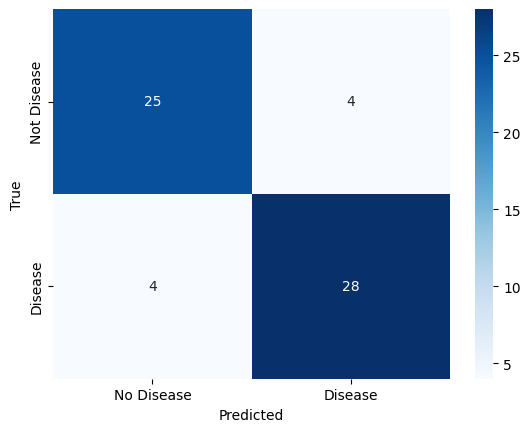

In [26]:
cm2 = confusion_matrix(y_test1,y_test_pred1)
plt.Figure(figsize=(10,7))
sns.heatmap(cm2,annot=True,fmt='d',cmap='Blues',xticklabels=['No Disease', 'Disease'], yticklabels=['Not Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
#Testing the Model 2
a1 = [100	,0,	7	,90	,133	,1	,0	,450	,1	,8.3	,0	,0	,1]
y_set2 = sv.predict([a1])
print(y_set2[0])

1


In [18]:
#Model 3 : KNN
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train1,y_train_pred)
y_train_pred2= kn.predict(x_train1)
y_test_pred2= kn.predict(x_test1)
print(f"accuracy_score on training data: {accuracy_score(y_train1,y_train_pred2)}")
print(f"accuracy_score on test data: {accuracy_score(y_test1,y_test_pred2)}")
print(f"\n classification report on training data: {classification_report(y_train1,y_train_pred2)}")
print(f"\n classification report on test data: {classification_report(y_test1,y_test_pred2)}")


accuracy_score on training data: 0.8636363636363636
accuracy_score on test data: 0.9180327868852459

 classification report on training data:               precision    recall  f1-score   support

           0       0.87      0.82      0.84       109
           1       0.86      0.90      0.88       133

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242


 classification report on test data:               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



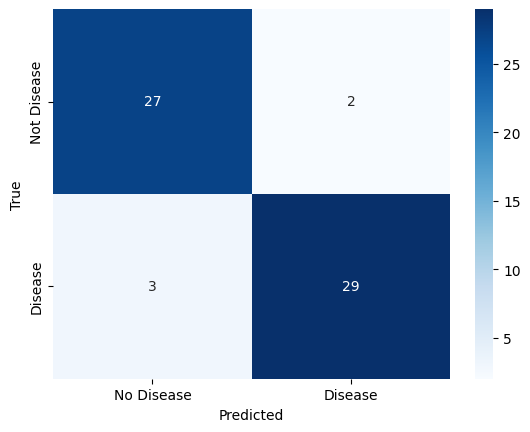

In [28]:
cm3 = confusion_matrix(y_test1,y_test_pred2)
plt.Figure(figsize=(10,7))
sns.heatmap(cm3,annot=True,fmt='d',cmap='Blues',xticklabels=['No Disease', 'Disease'], yticklabels=['Not Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
a2 = [100	,0,	7	,90	,133	,1	,0	,450	,1	,8.3	,0	,0	,1]
y_set3 = kn.predict([a2])
print(y_set3[0])

1


In [32]:
#Model 4 : xgboost
xg = XGBClassifier()
xg.fit(x_train,y_train)
y_train_pred3 = xg.predict(x_train)
y_test_pred3 = xg.predict(x_test)
print(f"accuracy_score on training data:  {accuracy_score(y_train,y_train_pred3)}")
print(f"accuracy_score on test data:  {accuracy_score(y_test,y_test_pred3)}")
print(f"classification report on training data:{classification_report(y_train,y_train_pred3)}")
print(f"classification report on training data:{classification_report(y_test,y_test_pred3)}")

accuracy_score on training data:  1.0
accuracy_score on test data:  0.819672131147541
classification report on training data:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

classification report on training data:              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



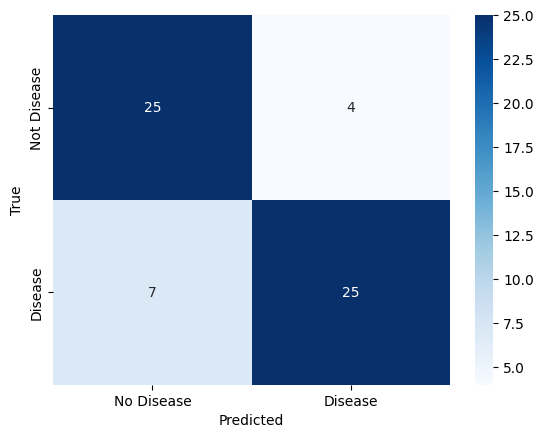

In [29]:
cm4 = confusion_matrix(y_test,y_test_pred3)
plt.Figure(figsize=(10,7))
sns.heatmap(cm4,annot=True,fmt='d',cmap='Blues',xticklabels=['No Disease', 'Disease'], yticklabels=['Not Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
a3 = [100	,0,	7	,90	,133	,1	,0	,450	,1	,8.3	,0	,0	,1]
y_set4 = kn.predict([a3])
print(y_set4[0])

1
